# 공공데이터 상권정보 분석하기

- https://www.data.go.kr/dataset/15012005/fileData.do
- 데이터 스토어 : https://www.datastore.or.kr/file/list
- 상권별 업종밀집통계정보 다운

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 상가업소정보 2019년 6월

In [8]:
# 데이터 불러오기
shop_2019_06 = pd.read_csv('../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019_06.tail()

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
565011  16284103   서동수타짬뽕  NaN         Q       음식       Q02       중식   
565012  16282701       주방  NaN         Q       음식       Q02       중식   
565013  16283091  원클래스독서실  NaN         R    학문/교육       R10  도서관/독서실   
565014  16287899    에스에스엠  NaN         D       소매       D12   가전제품소매   
565015  16286754     천사통신  NaN         D       소매       D12   가전제품소매   

       상권업종소분류코드  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
565011    Q02A00  중국음식/중국집   I56112  ...  2641011000102180001013127      NaN   
565012    Q02A00  중국음식/중국집   I56112  ...  1144012300100570138013520      NaN   
565013    R10A01       독서실   R90212  ...  2626010800112480004011513  월드메디컬타워   
565014    D12A05     전화기판매   G47312  ...  2638010300105220024033909    선경아트빌   
565015    D12A05     전화기판매   G47312  ...  2614011800100170005012010      NaN   

                          도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도  \
565011       부산광역시 금정구 서동중심로 14  609831  46328.0  NaN  NaN  NaN  129.104354   
565012     서울특별시 마포구 월드컵로19길 42  121820   4012.0  NaN    2  NaN  126.907641   
565013   부산광역시 동래구 아시아드대로 239-1  607841  47851.0  NaN    2  202  129.067468   
565014  부산광역시 사하구 낙동남로1367번길 16  604853  49314.0  NaN  NaN  101  128.961386   
565015     부산광역시 서구 구덕로124번길 27  602055  49246.0  NaN  NaN  NaN  129.022555   

               위도  
565011  35.210961  
565012  37.555677  
565013  35.205469  
565014  35.107213  
565015  35.097951  

[5 rows x 39 columns]

In [7]:
shop_2019_06.shape

(565016, 39)

In [9]:
shop_2019_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
# 사용할 컬럼을 리스트 안에 넣기
view_columns = ['상호명', '지점명', 
                '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
                '시도명', '시군구명', '행정동명', '법정동명',
               '지번주소', '경도', '위도']
shop_2019_06[view_columns].head(10)

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0  커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
1           프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
2       싱싱커피&토스트         NaN       음식     패스트푸드        토스트전문  부산광역시  사상구   
3         와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
4       가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
5          석봉토스트         NaN       음식     패스트푸드        토스트전문  서울특별시  광진구   
6           허술한집         NaN       음식        분식       라면김밥분식  서울특별시  강서구   
7           피자마루         약수점       음식     패스트푸드         피자전문  서울특별시   중구   
8           홍능갈비         NaN       음식        한식       갈비/삼겹살  서울특별시  강서구   
9            초밥왕         NaN       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구   

   행정동명 법정동명                  지번주소          경도         위도  
0  역삼1동  역삼동  서울특별시 강남구 역삼동 696-42  127.047883  37.505675  
1  독산3동  독산동   서울특별시 금천구 독산동 162-1  126.899220  37.471711  
2   괘법동  괘법동     부산광역시 사상구 괘법동 578  128.980455  35.159774  
3  대치1동  대치동     서울특별시 강남구 대치동 604  127.061026  37.493922  
4   석촌동  석촌동     서울특별시 송파구 석촌동 256  127.104071  37.500249  
5  구의2동  구의동   서울특별시 광진구 구의동 77-47  127.088387  37.549245  
6   공항동  공항동   서울특별시 강서구 공항동 45-89  126.809957  37.562013  
7   약수동  신당동   서울특별시 중구 신당동 372-95  127.010861  37.552153  
8  화곡1동  화곡동  서울특별시 강서구 화곡동 1086-3  126.836078  37.538927  
9  잠실6동  신천동    서울특별시 송파구 신천동 7-28  127.102490  37.515149

In [12]:
# 컬럼별 null의 개수를 표시
shop_2019_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          489492
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      32952
표준산업분류명       32952
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        494164
건물관리번호            0
건물명          303808
도로명주소             0
구우편번호             0
신우편번호             9
동정보          514802
층정보          220463
호정보          481880
경도                0
위도                0
dtype: int64

### missingno로 결측치 보기
- 설치하기
- pip install missingno

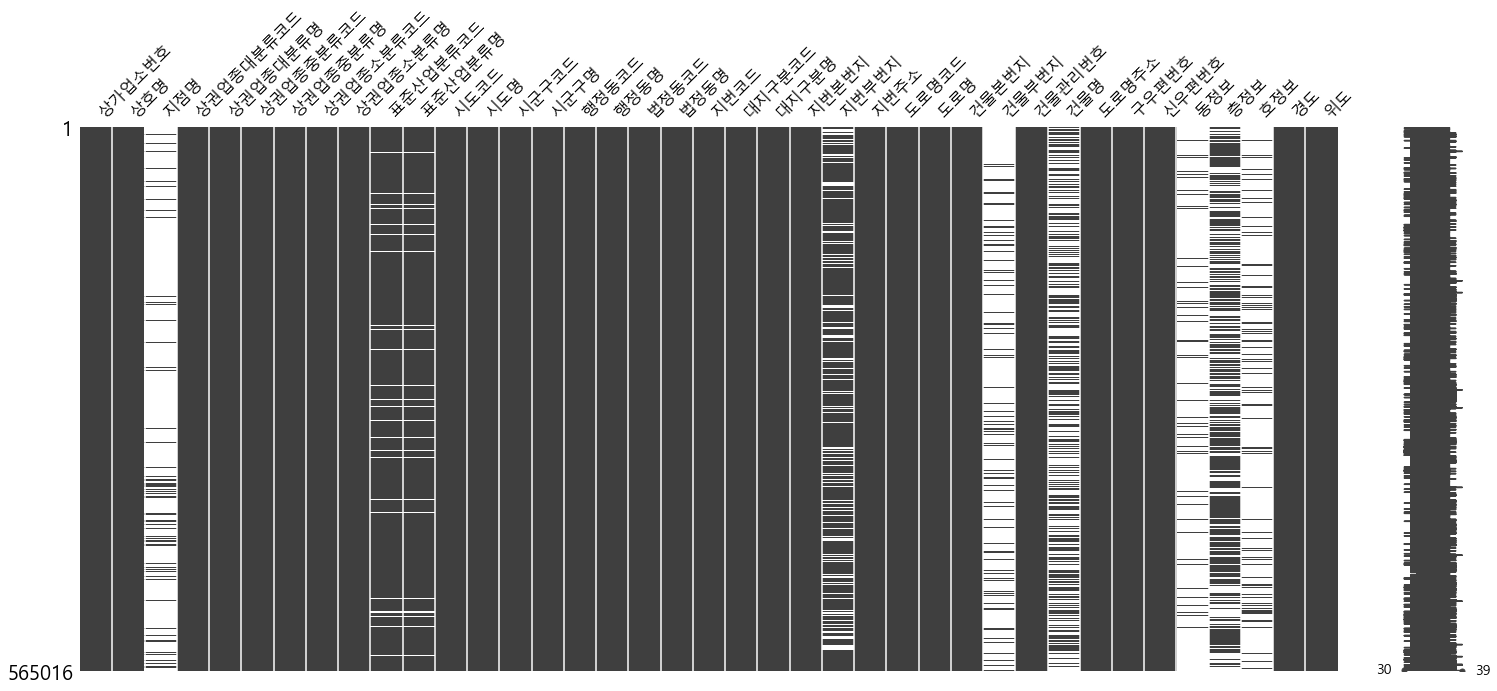

In [14]:
import missingno as msno

msno.matrix(shop_2019_06)

# 하얀색이 많은 컬럼은 결측치가 많다는 의미이다

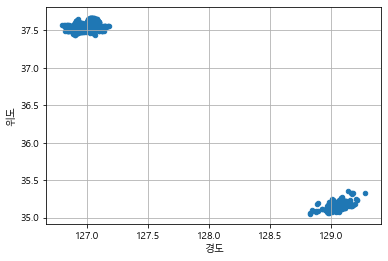

In [15]:
# Pandas의 plot으로 위도와 경도를 산점도로 그리기
# 일부분(1000개)의 데이터를 가지고 산점도 그리기

shop_2019_06[:1000].plot.scatter(x='경도', y='위도', grid=True)

In [17]:
# 산점도 확인 결과, 서울과 부산 정보만 있음을 확인
# 서울과 그 나머지 지역 데이터로 나누기

# shop_2019_06['시도명'].unique()
# shop_seoul = shop_2019_06.loc[shop_2019_06['시도명']=='서울특별시']
# 또는
# 도로명주소 중 서울로 시작하는 데이터를 새로운 데이터 프레임으로 저장
shop_seoul = shop_2019_06.loc[shop_2019_06['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_2019_06.loc[~shop_2019_06['도로명주소'].str.startswith('서울')]

print(shop_seoul.shape)
print(shop_except_seoul.shape)

(401071, 39)
(163945, 39)


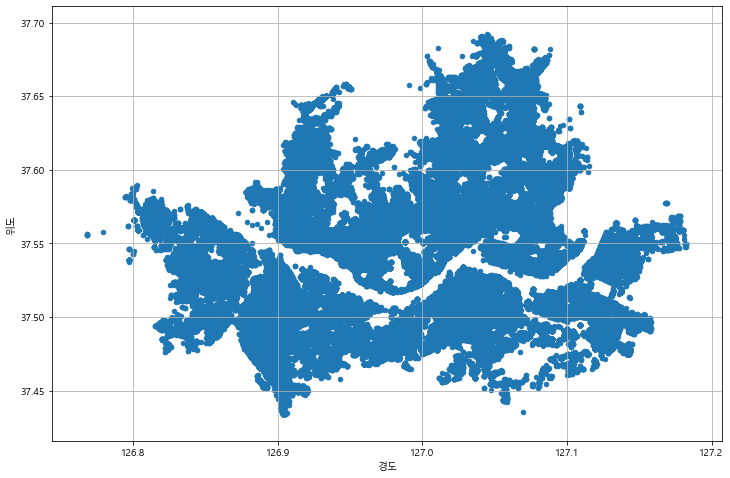

In [19]:
# Pandas의 plot으로 위도와 경도를 산점도로 그리기
# 그래프 사이즈를 figsize로 조절한다

shop_seoul.plot.scatter(x='경도', y='위도', figsize=(12,8), grid=True)

In [22]:
shop_2019_06['도로명주소'].head()

0      서울특별시 강남구 선릉로93길 6
1      서울특별시 금천구 가산로 34-6
2        부산광역시 사상구 괘감로 37
3    서울특별시 강남구 남부순환로 2933
4        서울특별시 송파구 가락로 71
Name: 도로명주소, dtype: object

In [26]:
print(shop_2019_06.shape)
shop_2019_06['시도'] = shop_2019_06['도로명주소'].str.split(' ', expand=True)[0]
shop_2019_06['구군'] = shop_2019_06['도로명주소'].str.split(' ', expand=True)[1]
print(shop_2019_06.shape)
shop_2019_06.columns

(565016, 41)
(565016, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

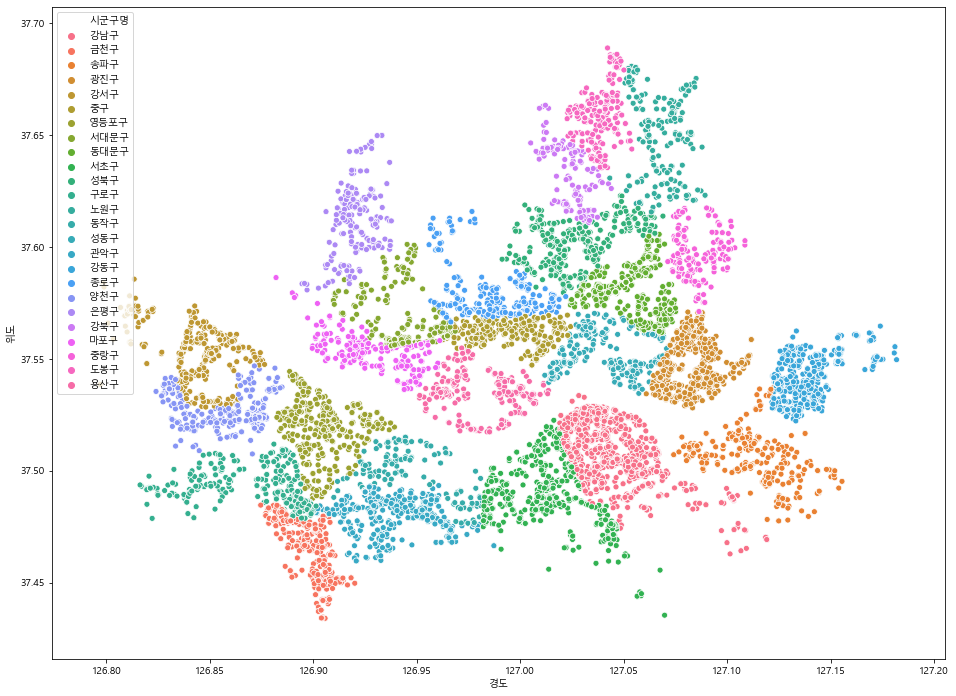

In [29]:
# seaborn을 통해 시각화
# 10000건의 데이터 시각화

plt.figure(figsize = (16,12))
sns.scatterplot(data=shop_seoul[:10000], x='경도', y='위도', hue='시군구명')

### 서울권 상권 분석

In [30]:
shop_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

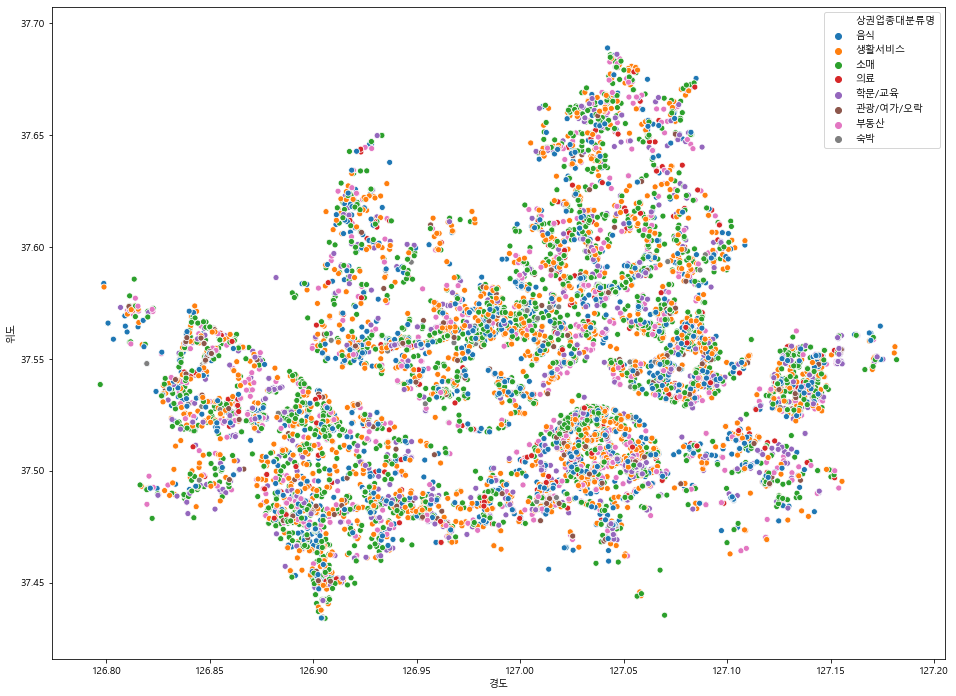

In [31]:
# 업종 대분류명으로 분류하여 시각화

plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul[:10000], x='경도', y='위도', hue='상권업종대분류명')

### 학문/교육과 관련된 정보 보기

In [32]:
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명']=='학문/교육']

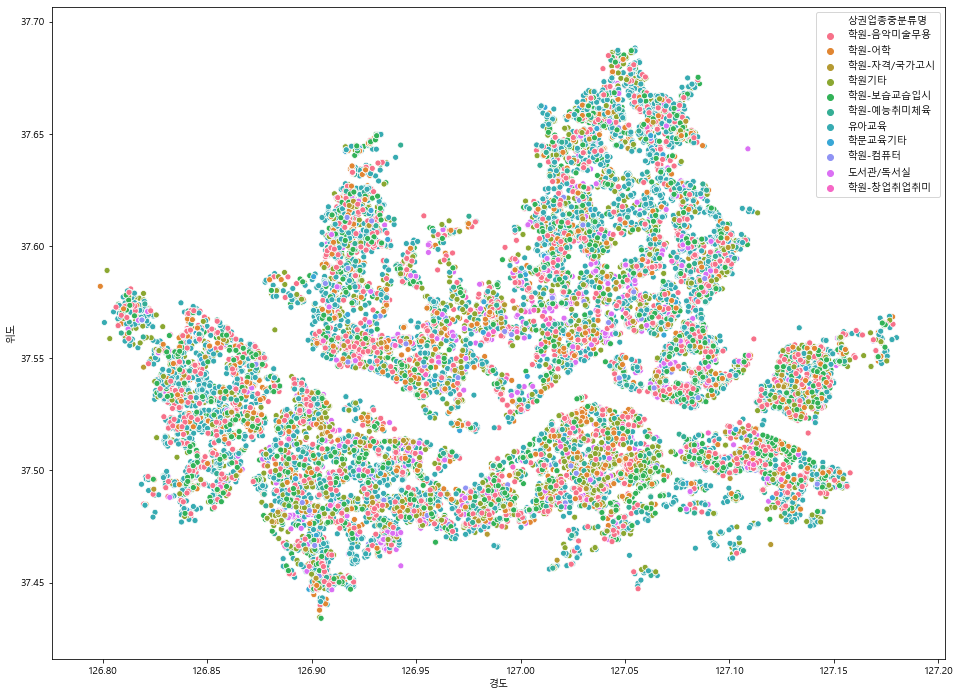

In [33]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명')

## 부동산과 관련된 정보 얻기

In [34]:
shop_seoul_realty = shop_seoul[shop_seoul['상권업종대분류명']=='부동산']

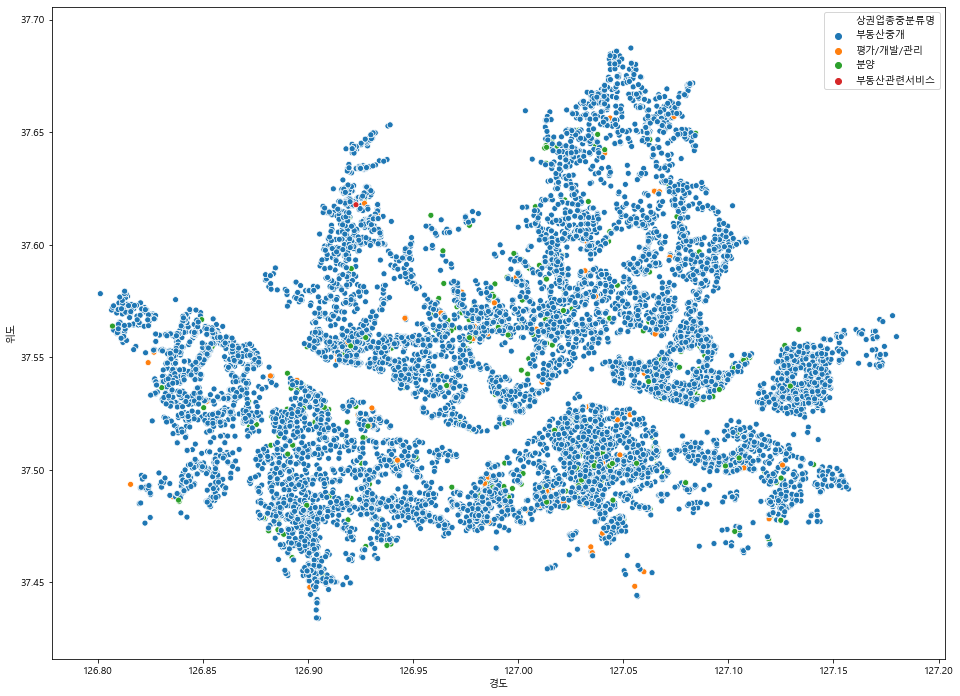

In [35]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_realty, x='경도', y='위도', hue='상권업종중분류명')

### 생활서비스와 관련된 정보 보기

In [36]:
shop_seoul_life = shop_seoul[shop_seoul['상권업종대분류명']=='생활서비스']

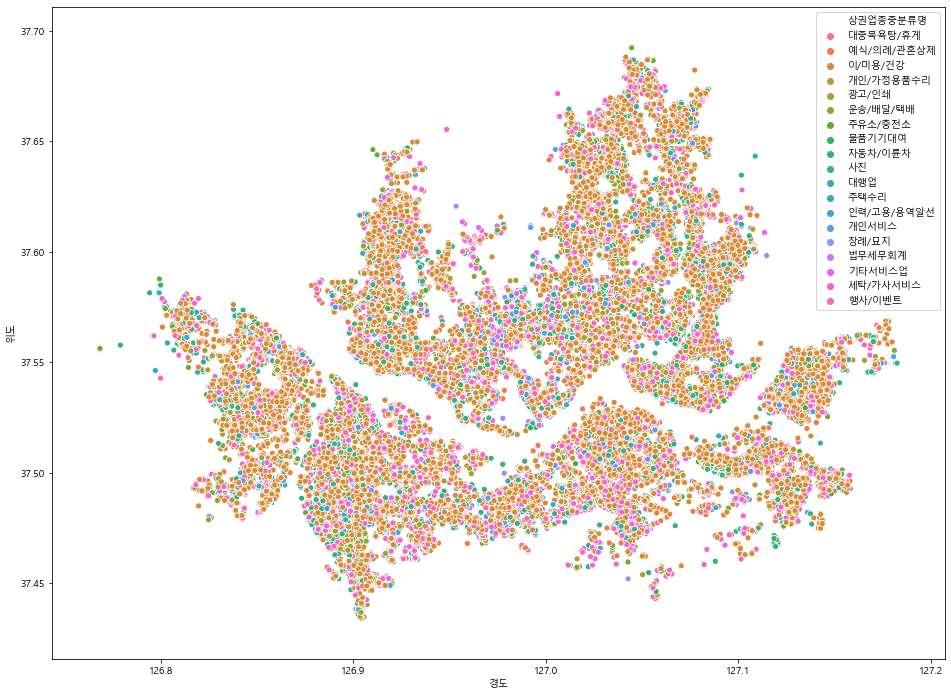

In [37]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_life, x='경도', y='위도', hue='상권업종중분류명')

### 중분류 => 학원-컴퓨터와 관련된 정보 보기

In [38]:
shop_seoul_edu_comp = shop_seoul_edu[shop_seoul_edu['상권업종중분류명']=='학원-컴퓨터']

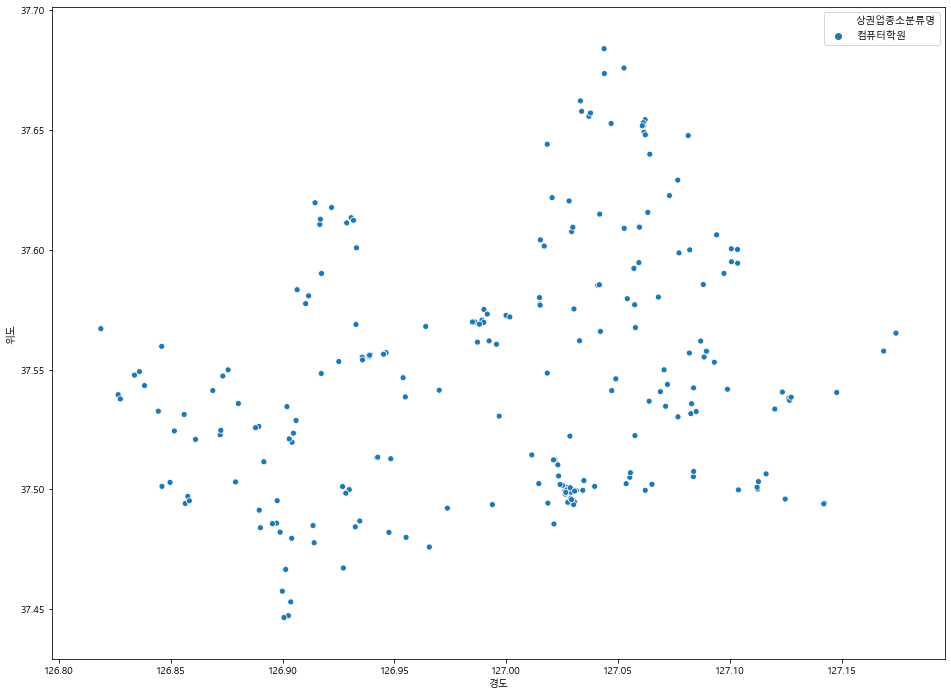

In [39]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_edu_comp, x='경도', y='위도', hue='상권업종소분류명')

### 지도 위에 표시하기

In [45]:
import folium

# folium.Map(지도의 중점값[위도, 경도], zoom_start, tiles)

def show_marker_map(geo_df):
    map = folium.Map(location=[geo_df['위도'].mean(),
                              geo_df['경도'].mean()],
                    zoom_start=11,
                    tiles='Stamen Terrain')
    
    for n in geo_df.index:
        shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
        folium.Marker([geo_df.loc[n, '위도'],
                      geo_df.loc[n, '경도']],
                     popup = shop_name).add_to(map)
        
    return map

In [46]:
show_marker_map(shop_seoul_edu_comp)

### 커피점, 카페 분포 보기

In [50]:
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명']=='커피점/카페']

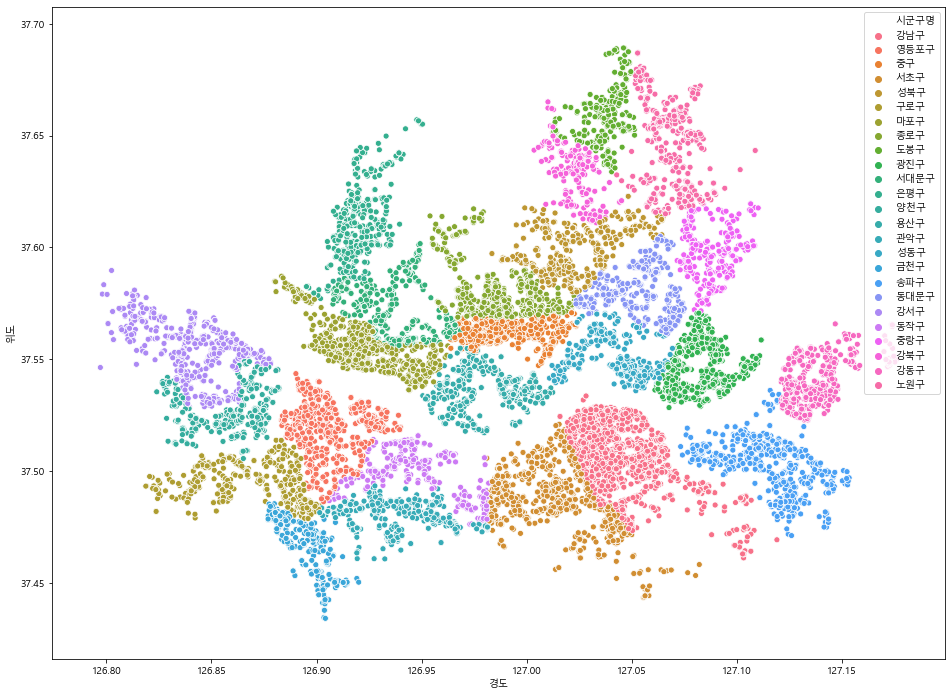

In [51]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_eat, x='경도', y='위도', hue='시군구명')

In [53]:
shop_seoul_eat.shape

(18651, 39)

In [57]:
show_marker_map(shop_seoul_eat[shop_seoul_eat["시군구명"]=='중구'])